# Introduction

Character based RNN will learn text structure and generate new text based on written works.<br>
This works by passing an input string eg ['h','e','l','l'] <br>
the model will return ['e','l','l','o'] to spell hello.

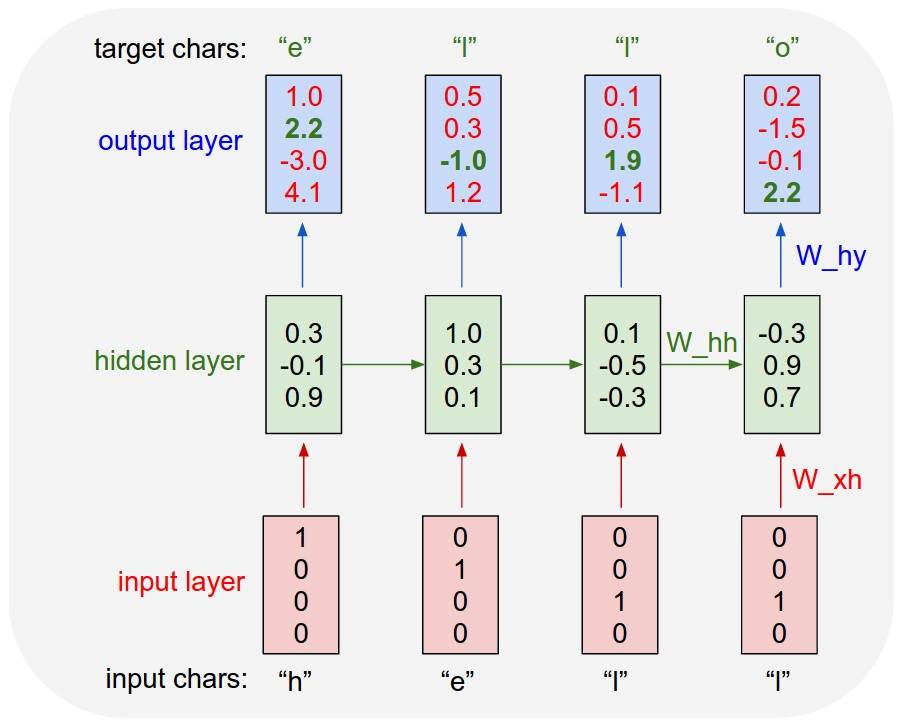

image from: https://stats.stackexchange.com/questions/153599/recurrent-vs-recursive-neural-networks-which-is-better-for-nlp <br>
Three step process for data preprocessing

Step 1: need to read in a large text database >1mill chars

Step 2: vectorize characters:<br>
        A:1<br>
        B:2<br>
        !:54<br>
        ?:55<br>

Step 3: create text batches. Batches should contain sequences long enough to capture structure but not so long as to cature historical noise.



# Text preprocess

## read in and explore

In [14]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
text = open('shakespeare.txt','r').read()

In [3]:
print(text[:1000])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep su

In [4]:
vocab = sorted(set(text))

In [5]:
#84 unique characters
len(vocab)

84

## vectorise text

In [9]:
char_map = {char:ind for ind,char in enumerate(vocab)}
char_map

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '&': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 ',': 8,
 '-': 9,
 '.': 10,
 '0': 11,
 '1': 12,
 '2': 13,
 '3': 14,
 '4': 15,
 '5': 16,
 '6': 17,
 '7': 18,
 '8': 19,
 '9': 20,
 ':': 21,
 ';': 22,
 '<': 23,
 '>': 24,
 '?': 25,
 'A': 26,
 'B': 27,
 'C': 28,
 'D': 29,
 'E': 30,
 'F': 31,
 'G': 32,
 'H': 33,
 'I': 34,
 'J': 35,
 'K': 36,
 'L': 37,
 'M': 38,
 'N': 39,
 'O': 40,
 'P': 41,
 'Q': 42,
 'R': 43,
 'S': 44,
 'T': 45,
 'U': 46,
 'V': 47,
 'W': 48,
 'X': 49,
 'Y': 50,
 'Z': 51,
 '[': 52,
 ']': 53,
 '_': 54,
 '`': 55,
 'a': 56,
 'b': 57,
 'c': 58,
 'd': 59,
 'e': 60,
 'f': 61,
 'g': 62,
 'h': 63,
 'i': 64,
 'j': 65,
 'k': 66,
 'l': 67,
 'm': 68,
 'n': 69,
 'o': 70,
 'p': 71,
 'q': 72,
 'r': 73,
 's': 74,
 't': 75,
 'u': 76,
 'v': 77,
 'w': 78,
 'x': 79,
 'y': 80,
 'z': 81,
 '|': 82,
 '}': 83}

In [10]:
index_to_char = np.array(vocab)

In [11]:
vectorised_text = np.array([char_map[c] for c in text])

In [12]:
vectorised_text

array([ 0,  1,  1, ..., 30, 39, 29])

## batches 

In [13]:
print(text[:500])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bu


In [11]:
lines = text.split('\n')

avg_line = len(text)/len(lines)
avg_line

43.86455463728191

line is around 44 characters model needs structure to learn shakespear as his works utilise an iambic pentameter so batched will need to be around 3 lines long so sequence length of about 120 chars seems sufficient.

In [15]:
seq_len = math.floor(avg_line*3)
total_sequences = len(text) // (seq_len+1)
total_sequences

41254

In [16]:
char_dataset = tf.data.Dataset.from_tensor_slices(vectorised_text)

In [17]:
#for item in char_dataset.take(500):
#    print(index_to_char[item.numpy()])

In [18]:
sequences = char_dataset.batch(seq_len+1,drop_remainder=True)

In [19]:
def create_seq_targs(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    return input_txt,target_txt

In [20]:
dataset = sequences.map(create_seq_targs)

In [21]:
for input_txt, target_txt in dataset.take(1):
    print(input_txt.numpy())
    print(''.join(index_to_char[input_txt.numpy()]))
    print('\n')
    print(target_txt.numpy())
    print(''.join(index_to_char[target_txt.numpy()]))

[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74
  1 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45
 63 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74
 60  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75]

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0  1
  1 31 73 70 68  1 61 56 64 73 60 74 75  1 58 73 60 56 75 76 73 60 74  1
 78 60  1 59 60 74 64 73 60  1 64 69 58 73 60 56 74 60  8  0  1  1 45 63
 56 75  1 75 63 60 73 60 57 80  1 57 60 56 76 75 80  5 74  1 73 70 74 60
  1 68 64 62 63 75  1 69 60 77 60 73  1 59 64 60  8  0  1  1 27 76 75  1]
                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But 


In [22]:
batch_size = 128

In [23]:
buffer_size = 10000
dataset = dataset.shuffle(buffer_size).batch(batch_size,drop_remainder=True)

In [21]:
dataset

<BatchDataset shapes: ((128, 120), (128, 120)), types: (tf.int32, tf.int32)>

# Modeling

## Create Model

Set up loss function

create model:<br>
    Embedding<br>
    GRU<br>
    Dense

In [24]:
#same range as total vocab size
embeded_dim = 64
#as only single layer many neurons picked
rnn_neurons = 1026
#can add LSTM layers instead of GatedRecurrentUnit Layers and drop out layers

In [2]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense,LSTM,Dropout


def sparse_cat_loss(y_true,y_pred):
    return sparse_categorical_crossentropy(y_true,y_pred,from_logits=True)

def create_model(vocab_size,embeded_dim,rnn_neurons,batch_size):
    
    model = Sequential()
    model.add(Embedding(vocab_size,embeded_dim,batch_input_shape=[batch_size,None]))
    model.add(GRU(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform',dropout=0.15))
    model.add(Dense(vocab_size))
    
    model.compile('adam',loss=sparse_cat_loss)
    return model

In [24]:
model = create_model(vocab_size=len(vocab),
                     embeded_dim=embeded_dim,
                     rnn_neurons=rnn_neurons,
                     batch_size=batch_size)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (128, None, 64)           5376      
_________________________________________________________________
gru (GRU)                    (128, None, 1026)         3361176   
_________________________________________________________________
dense (Dense)                (128, None, 84)           86268     
Total params: 3,452,820
Trainable params: 3,452,820
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [25]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)

NameError: name 'model' is not defined

In [27]:
example_batch_predictions.shape
example_batch_predictions[0]

<tf.Tensor: shape=(120, 84), dtype=float32, numpy=
array([[ 4.4197016e-03,  3.4686942e-03, -1.9738092e-03, ...,
         8.0324023e-04,  6.0247944e-04,  4.2511742e-03],
       [ 2.8847686e-03,  6.0991105e-03,  1.5083358e-03, ...,
         4.5880284e-03,  7.5727009e-04,  3.6404497e-04],
       [ 9.1619475e-04,  3.5245055e-03, -1.6788723e-03, ...,
         1.7008123e-03,  5.6519164e-03, -6.3142477e-04],
       ...,
       [-4.8606402e-05,  2.6970762e-03,  7.0304442e-03, ...,
         6.0712285e-03,  5.1463842e-03, -5.3686826e-03],
       [-1.1012936e-03,  1.2128659e-03, -1.2478264e-04, ...,
         6.8104002e-03,  2.5398587e-04, -8.5611148e-03],
       [-7.4491454e-03,  8.3122315e-04,  1.8159262e-03, ...,
         2.8553943e-03,  5.4729258e-04,  1.1057080e-03]], dtype=float32)>

In [28]:
sampled_indexes = tf.random.categorical(example_batch_predictions[0],num_samples=1)
sampled_indexes = tf.squeeze(sampled_indexes,axis=-1).numpy()
index_to_char[sampled_indexes]

array(['Q', 'M', 'B', 'e', 'E', '4', '0', 'D', 'I', 'J', '0', '8', 'r',
       'j', '}', 'R', ']', '9', 'm', 'U', ':', 'R', ';', '?', ')', 'p',
       'N', '>', 'p', '8', 'e', '7', '\n', 'j', '!', 'c', '?', 'a', 'Q',
       'C', '>', '\n', '1', '`', 'B', 'H', 'M', '8', '`', 'H', 'T', '!',
       'z', ';', '9', 'v', '[', 'l', 'E', 'l', 'Y', 'B', 'F', ']', 'g',
       'G', "'", 'l', ';', '8', 'a', 'f', ']', "'", 't', 'r', '1', '6',
       '\n', '(', 'l', '(', 'Y', 'b', '|', '8', 'x', 'N', 'c', 'n', 'm',
       'P', '1', 'x', 'T', 'c', 'P', 'A', 'U', 'U', 'c', '4', 'b', '?',
       'D', 'u', ':', ';', 'O', 'A', 'c', 'C', 'J', 'p', 'C', 'o', 'L',
       '?', 'M', 'j'], dtype='<U1')

In [32]:
epochs = 32
model.fit(dataset,epochs=epochs)

Epoch 1/32
351/351 [==============================] - 846s 2s/step - loss: 2.5569
Epoch 2/32
351/351 [==============================] - 834s 2s/step - loss: 1.7803
Epoch 3/32
351/351 [==============================] - 818s 2s/step - loss: 1.5109
Epoch 4/32
351/351 [==============================] - 770s 2s/step - loss: 1.3851
Epoch 5/32
351/351 [==============================] - 768s 2s/step - loss: 1.3176
Epoch 6/32
351/351 [==============================] - 759s 2s/step - loss: 1.2754
Epoch 7/32
351/351 [==============================] - 764s 2s/step - loss: 1.2452
Epoch 8/32
351/351 [==============================] - 765s 2s/step - loss: 1.2215
Epoch 9/32
351/351 [==============================] - 763s 2s/step - loss: 1.2030
Epoch 10/32
351/351 [==============================] - 766s 2s/step - loss: 1.1863
Epoch 11/32
351/351 [==============================] - 763s 2s/step - loss: 1.1726
Epoch 12/32
351/351 [==============================] - 763s 2s/step - loss: 1.1608
Epoch 13/32
3

In [36]:
#saving model
model.save('shake-a-spear.h5')

In [26]:
model2 = create_model(vocab_size=len(vocab),
                     embeded_dim=embeded_dim,
                     rnn_neurons=rnn_neurons,
                     batch_size=1)

model2.load_weights('shake-a-spear.h5')

model2.build(tf.TensorShape([1,None]))

In [27]:
def gen_text(model,start_seed,gen_size=500,temp=1):
    
    num_generate = gen_size
    input_eval = [char_map[s] for s in start_seed]
    input_eval = tf.expand_dims(input_eval,0)
    text_generated = []
    temperature = temp
    
    model.reset_states()
    
    for i in range(num_generate):
        
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions,0)
        predictions = predictions/temperature
        
        predicted_id = tf.random.categorical(predictions,num_samples=1)[-1,0].numpy()
        
        input_eval = tf.expand_dims([predicted_id],0)
        text_generated.append(index_to_char[predicted_id])
    
    return (start_seed+''.join(text_generated))

In [29]:
#generate text using starting sample
print(gen_text(model2,'To be or not to be',gen_size=2000))

To be or not to be thankful; but
    rather witness' nothing shall be done.
  CELIA. Ay, a good shoen.
  QUICKLY. Pate, sir; it is ten two brothers of my mastard.
  PANDARUS. Thou desperate smalleth not; if they prove lollow gif that's
    mannerly. He said he not assure the theatien I should not know
    The louchest herpic to my name in France.
  DUKE. Pursue her by the terrs of men are madlish-
  TIMON. Know you him?
  PROTEUS. Soft! CELIO. By my troth, I care not.
  CLOWN. Hast he follow'd
    Of greater sails who should have given constrance;
    And buy nothing done, he is bound and counsel
    I' th' airy revilding death of players' leaves
    But beat defects of parillegies.
  TAMORA. Have you newer but to recoel her in the fountain
    Putt'd as ced as take all men.
  PRINCESS OF FRANCE. Our tongue and your chastree is abroad,
    I'll do't. For he is not the intercept
    Whom Tom, with nothing clap-
  LEONTES. Call all the puppies dead!
    Fpont to, I think not that, I do i